In [2]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = "D:\plant_disease_detection-main\Dataset\Train\Healthy"
train_files_powdery = "D:\plant_disease_detection-main\Dataset\Train\Powdery"
train_files_rust = "D:\plant_disease_detection-main\Dataset\Train\Rust"

test_files_healthy = "D:\plant_disease_detection-main\Dataset\Test\Healthy"
test_files_powdery = "D:\plant_disease_detection-main\Dataset\Test\Powdery"
test_files_rust = "D:\plant_disease_detection-main\Dataset\Test\Rust"

valid_files_healthy = "D:\plant_disease_detection-main\Dataset\Validation\Healthy"
valid_files_powdery = "D:\plant_disease_detection-main\Dataset\Validation\Powdery"
valid_files_rust = "D:\plant_disease_detection-main\Dataset\Validation\Rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("*********************************************************")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("*********************************************************")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
*********************************************************
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
*********************************************************
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


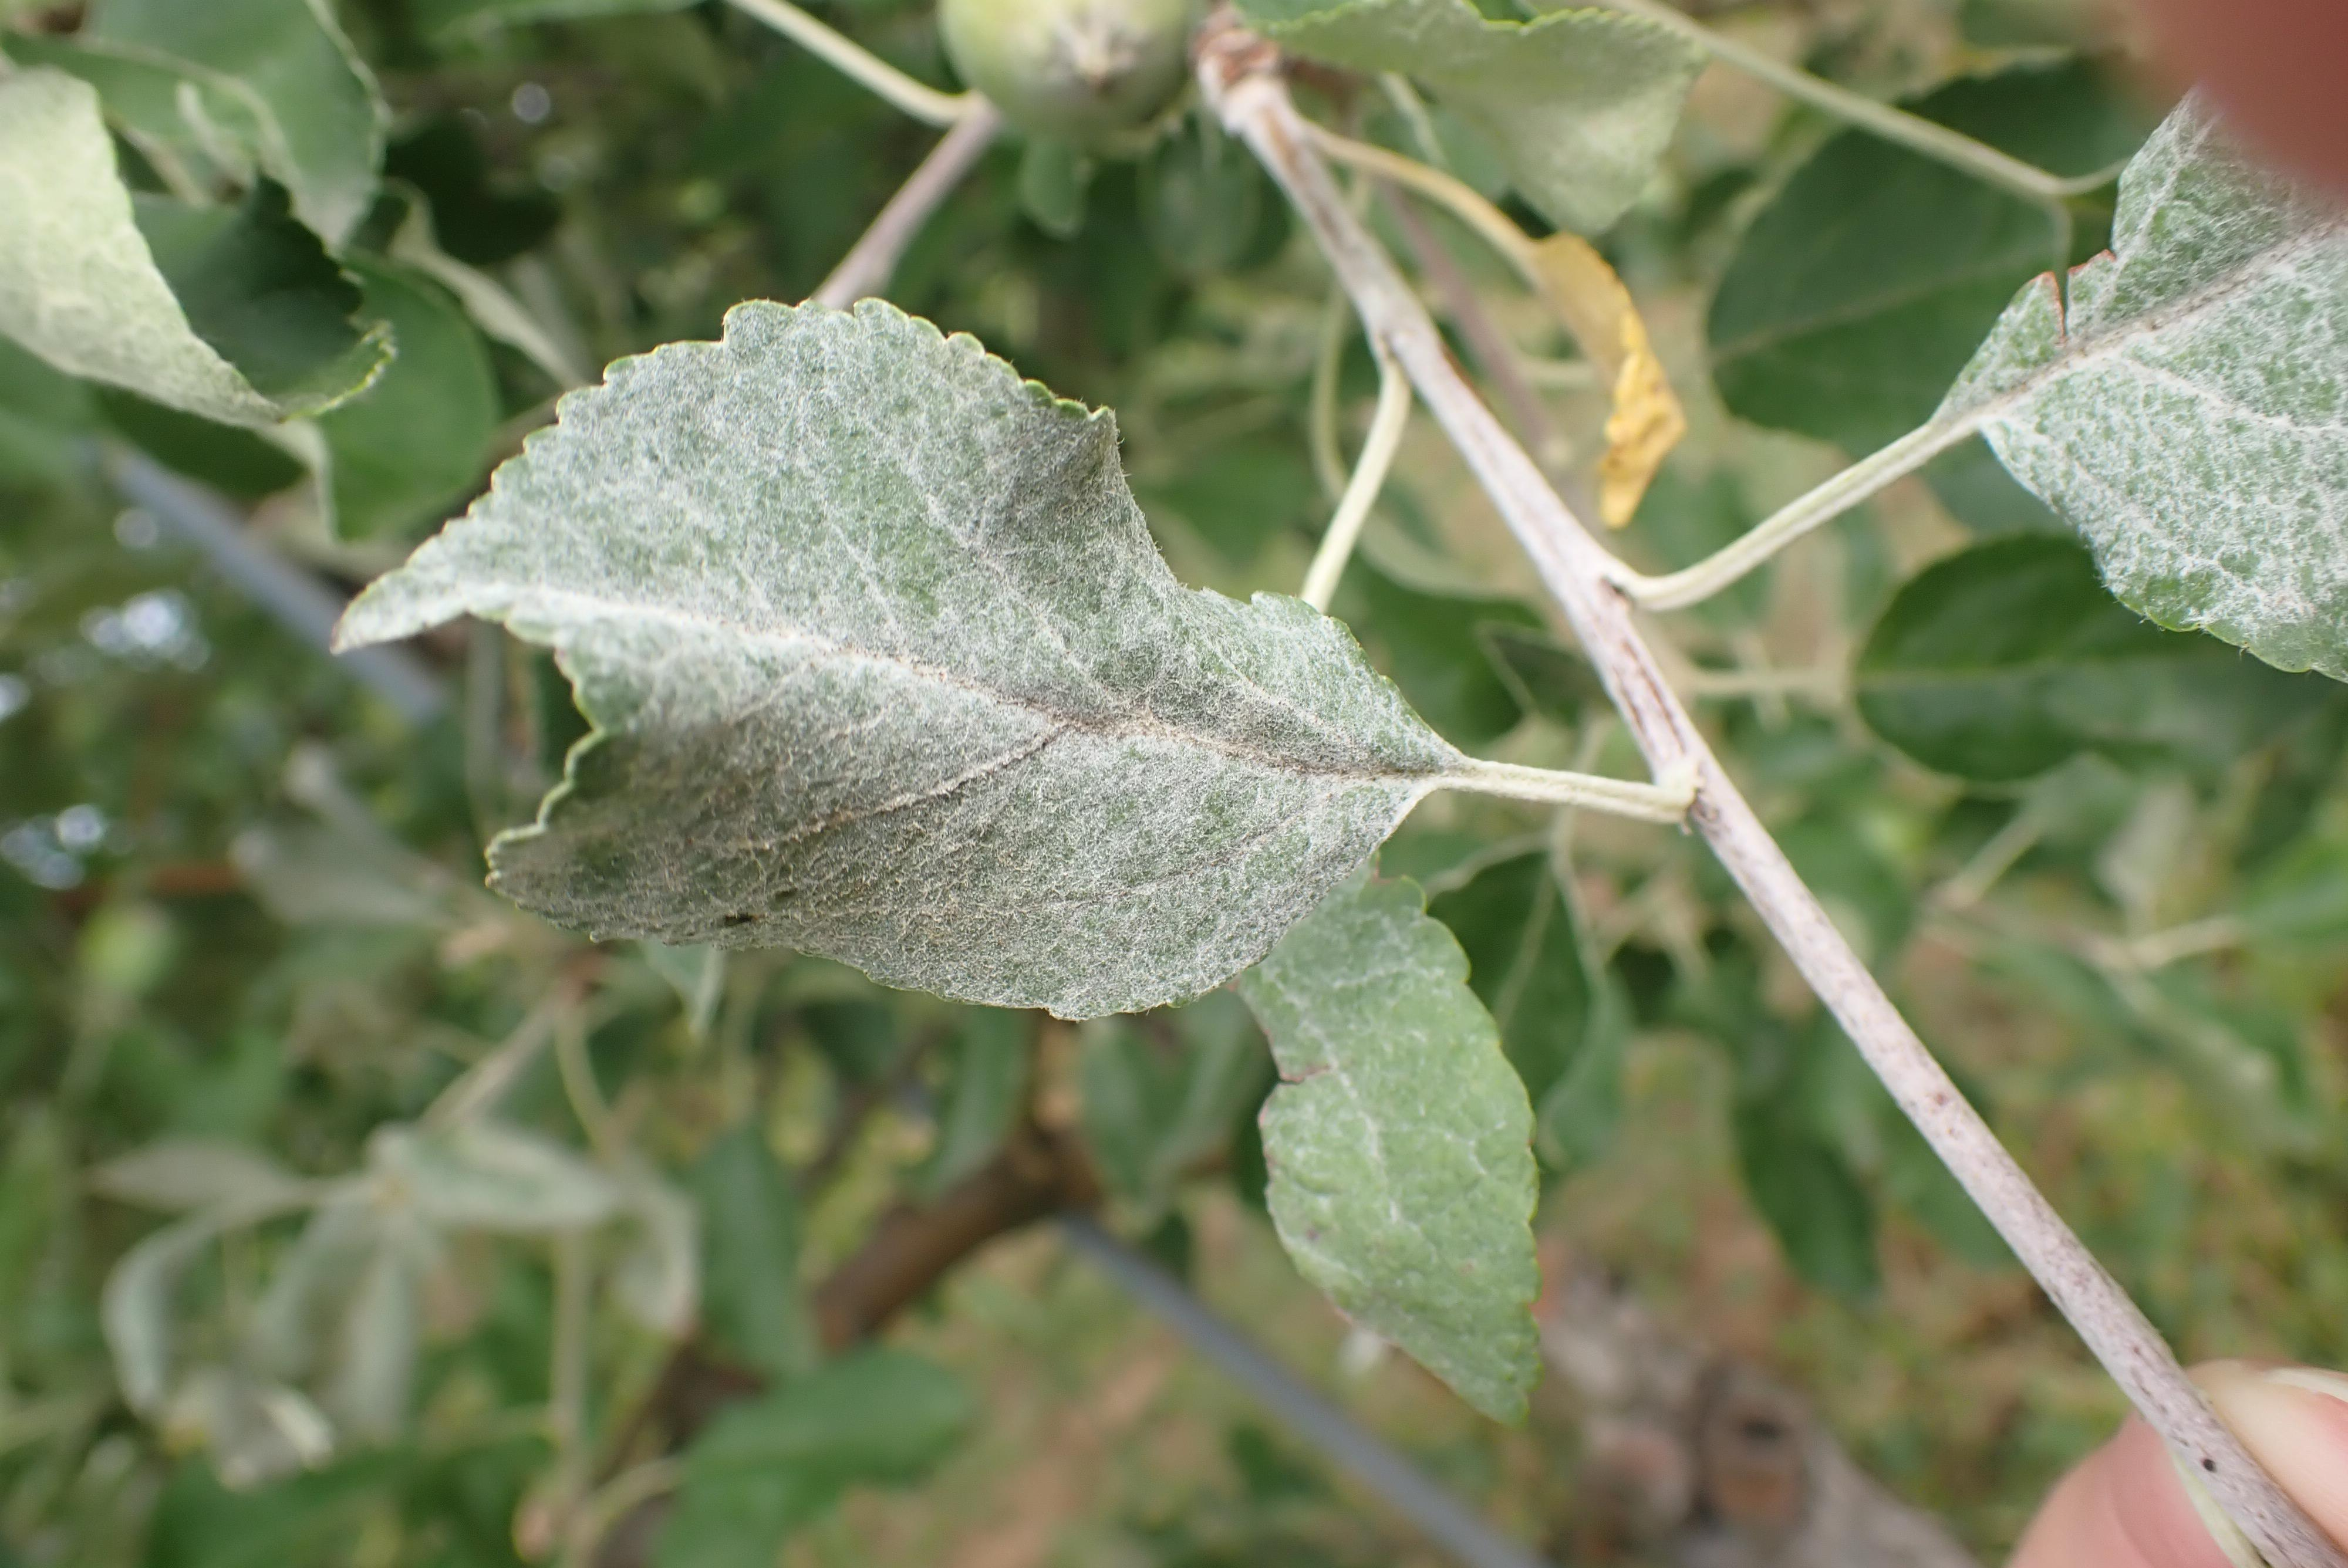

In [3]:
from PIL import Image
import IPython.display as display

image_path = 'D:\plant_disease_detection-main\Dataset\Train\Healthy\8bde3f5d5cd08484.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

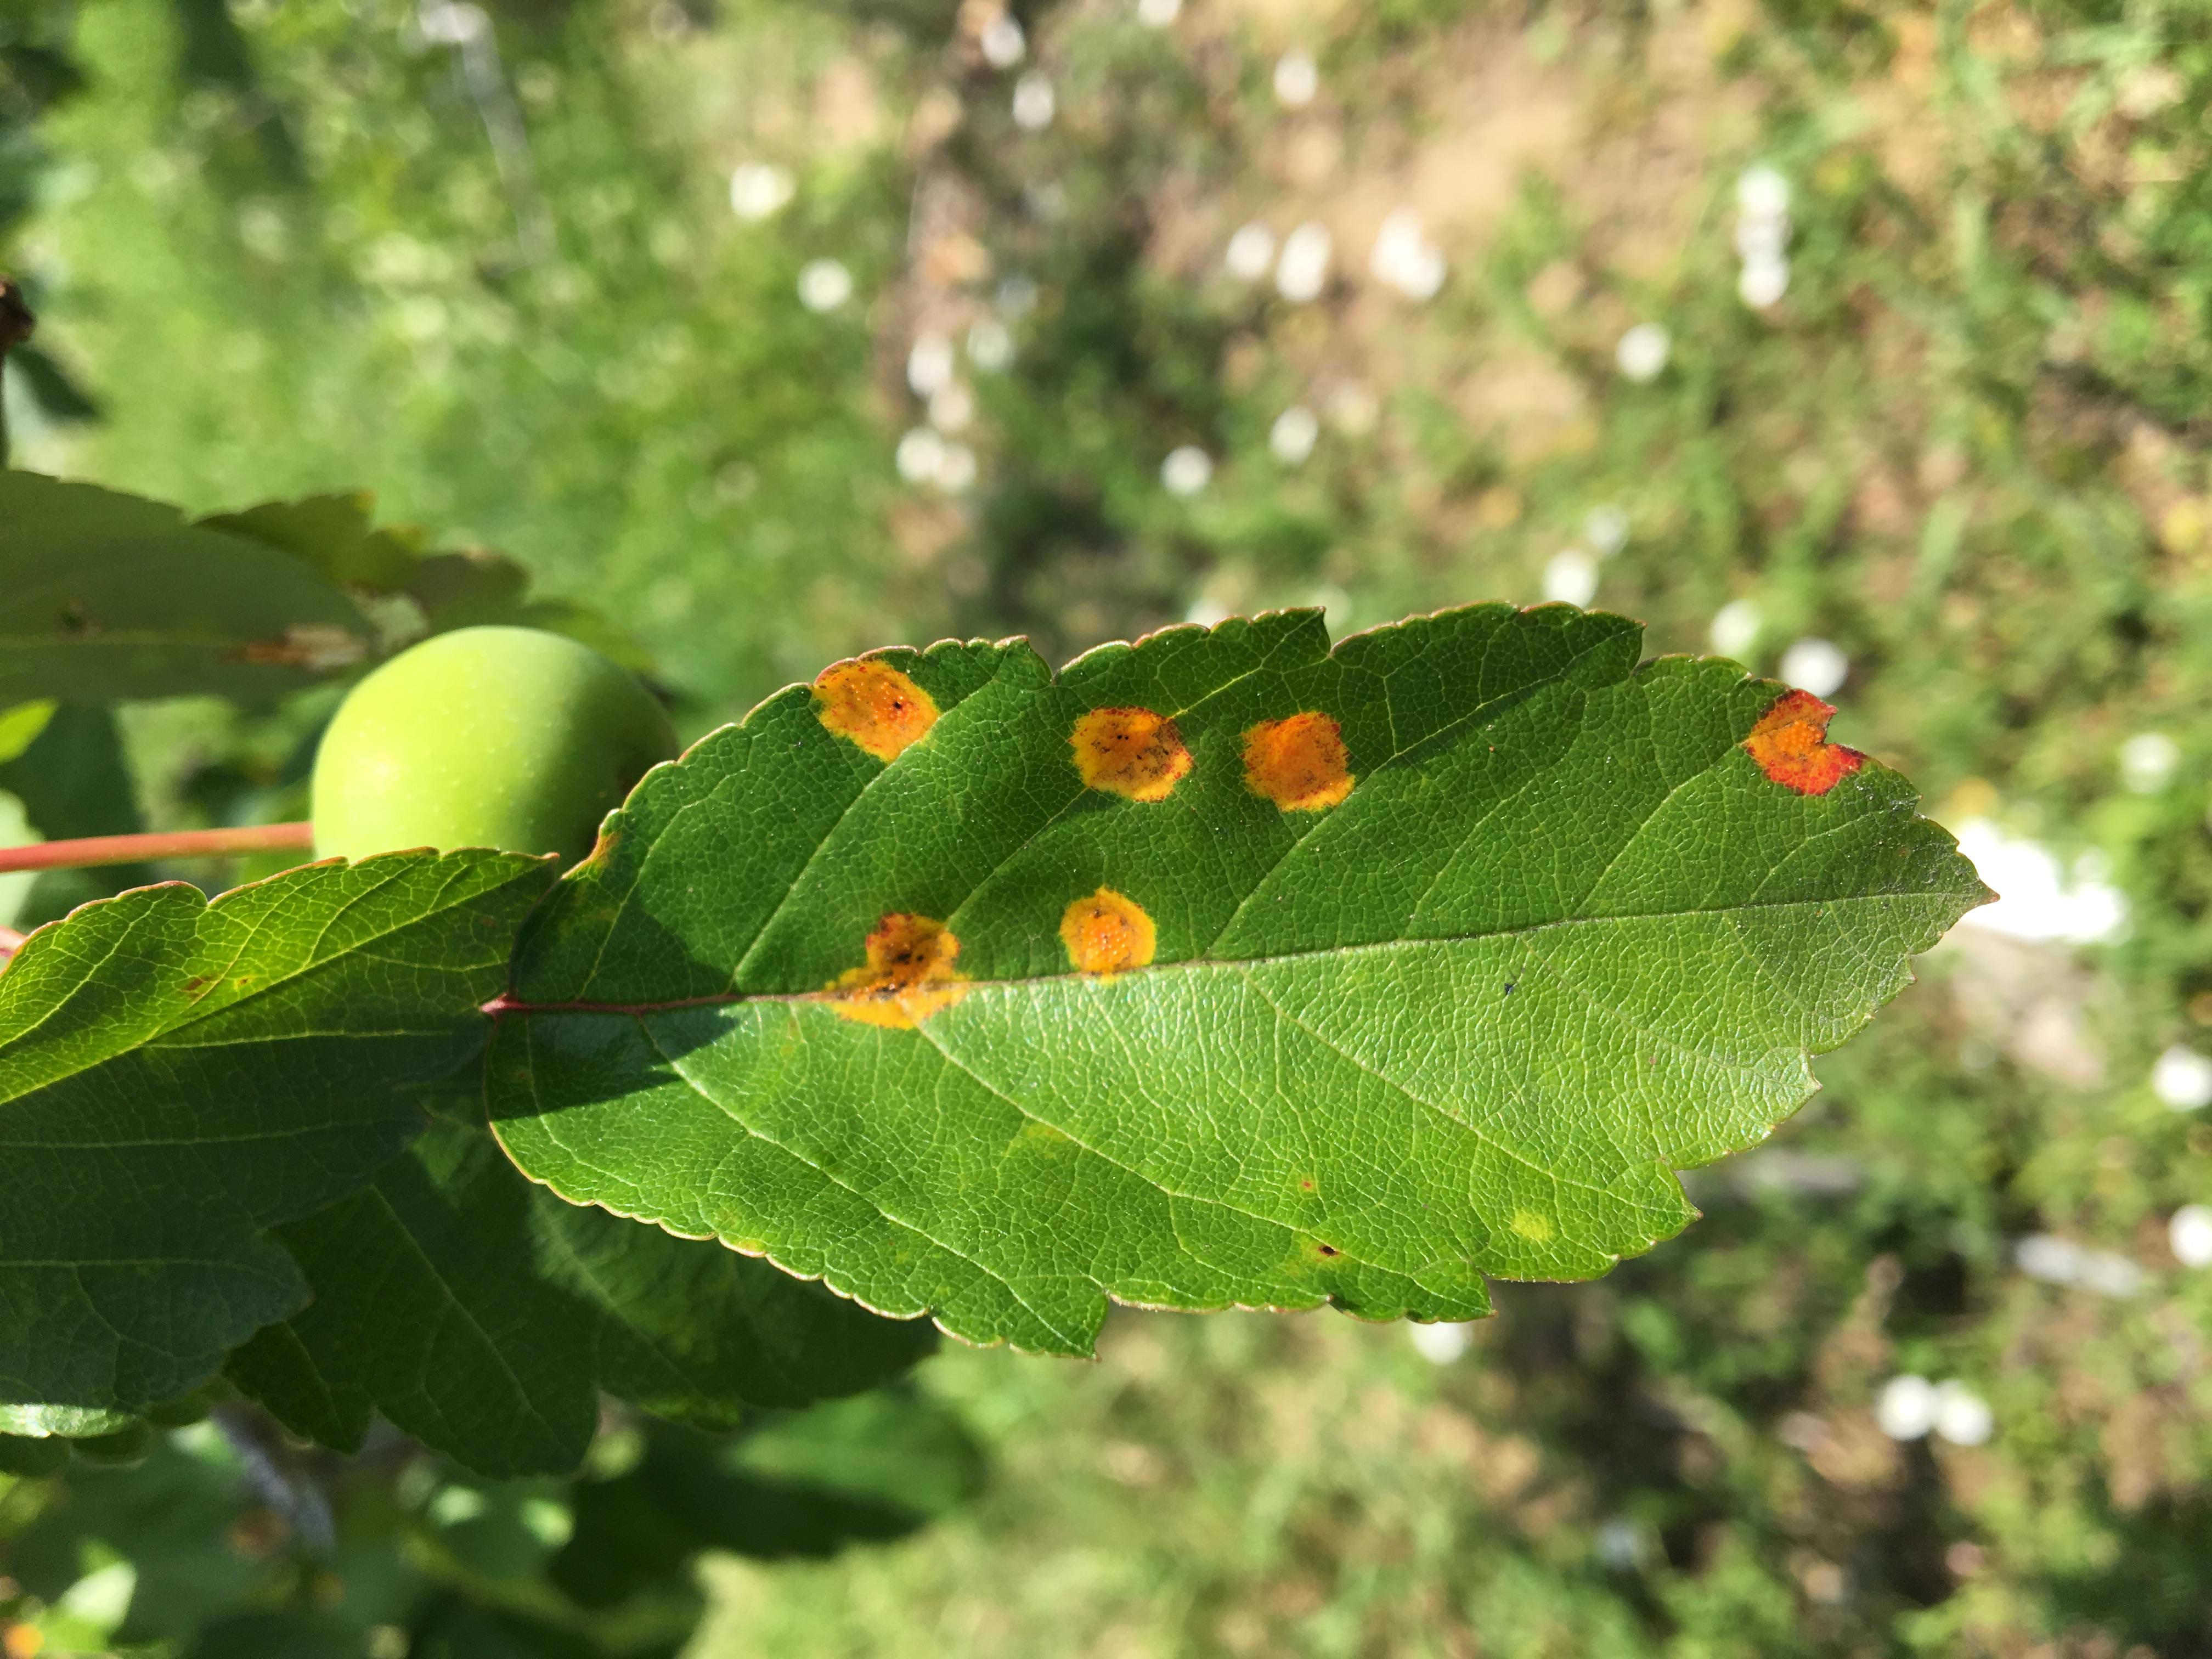

In [4]:
image_path = 'D:\plant_disease_detection-main\Dataset\Train\Rust\8ae29f9e6c218739.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))


In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory('D:\plant_disease_detection-main\Dataset\Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('D:\plant_disease_detection-main\Dataset\VAlidation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [7]:
train_generator

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
import scipy

In [11]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5
42/42 [==============================] - 79s 2s/step - loss: 1.2140 - accuracy: 0.5000 - val_loss: 0.8221 - val_accuracy: 0.6000
Epoch 2/5
42/42 [==============================] - 87s 2s/step - loss: 0.6783 - accuracy: 0.6982 - val_loss: 0.7030 - val_accuracy: 0.6500
Epoch 3/5
42/42 [==============================] - 97s 2s/step - loss: 0.5744 - accuracy: 0.7670 - val_loss: 0.4753 - val_accuracy: 0.7500
Epoch 4/5
42/42 [==============================] - 88s 2s/step - loss: 0.3978 - accuracy: 0.8351 - val_loss: 0.4430 - val_accuracy: 0.8333
Epoch 5/5
42/42 [==============================] - 76s 2s/step - loss: 0.3170 - accuracy: 0.8865 - val_loss: 0.4403 - val_accuracy: 0.8667


In [12]:
import matplotlib

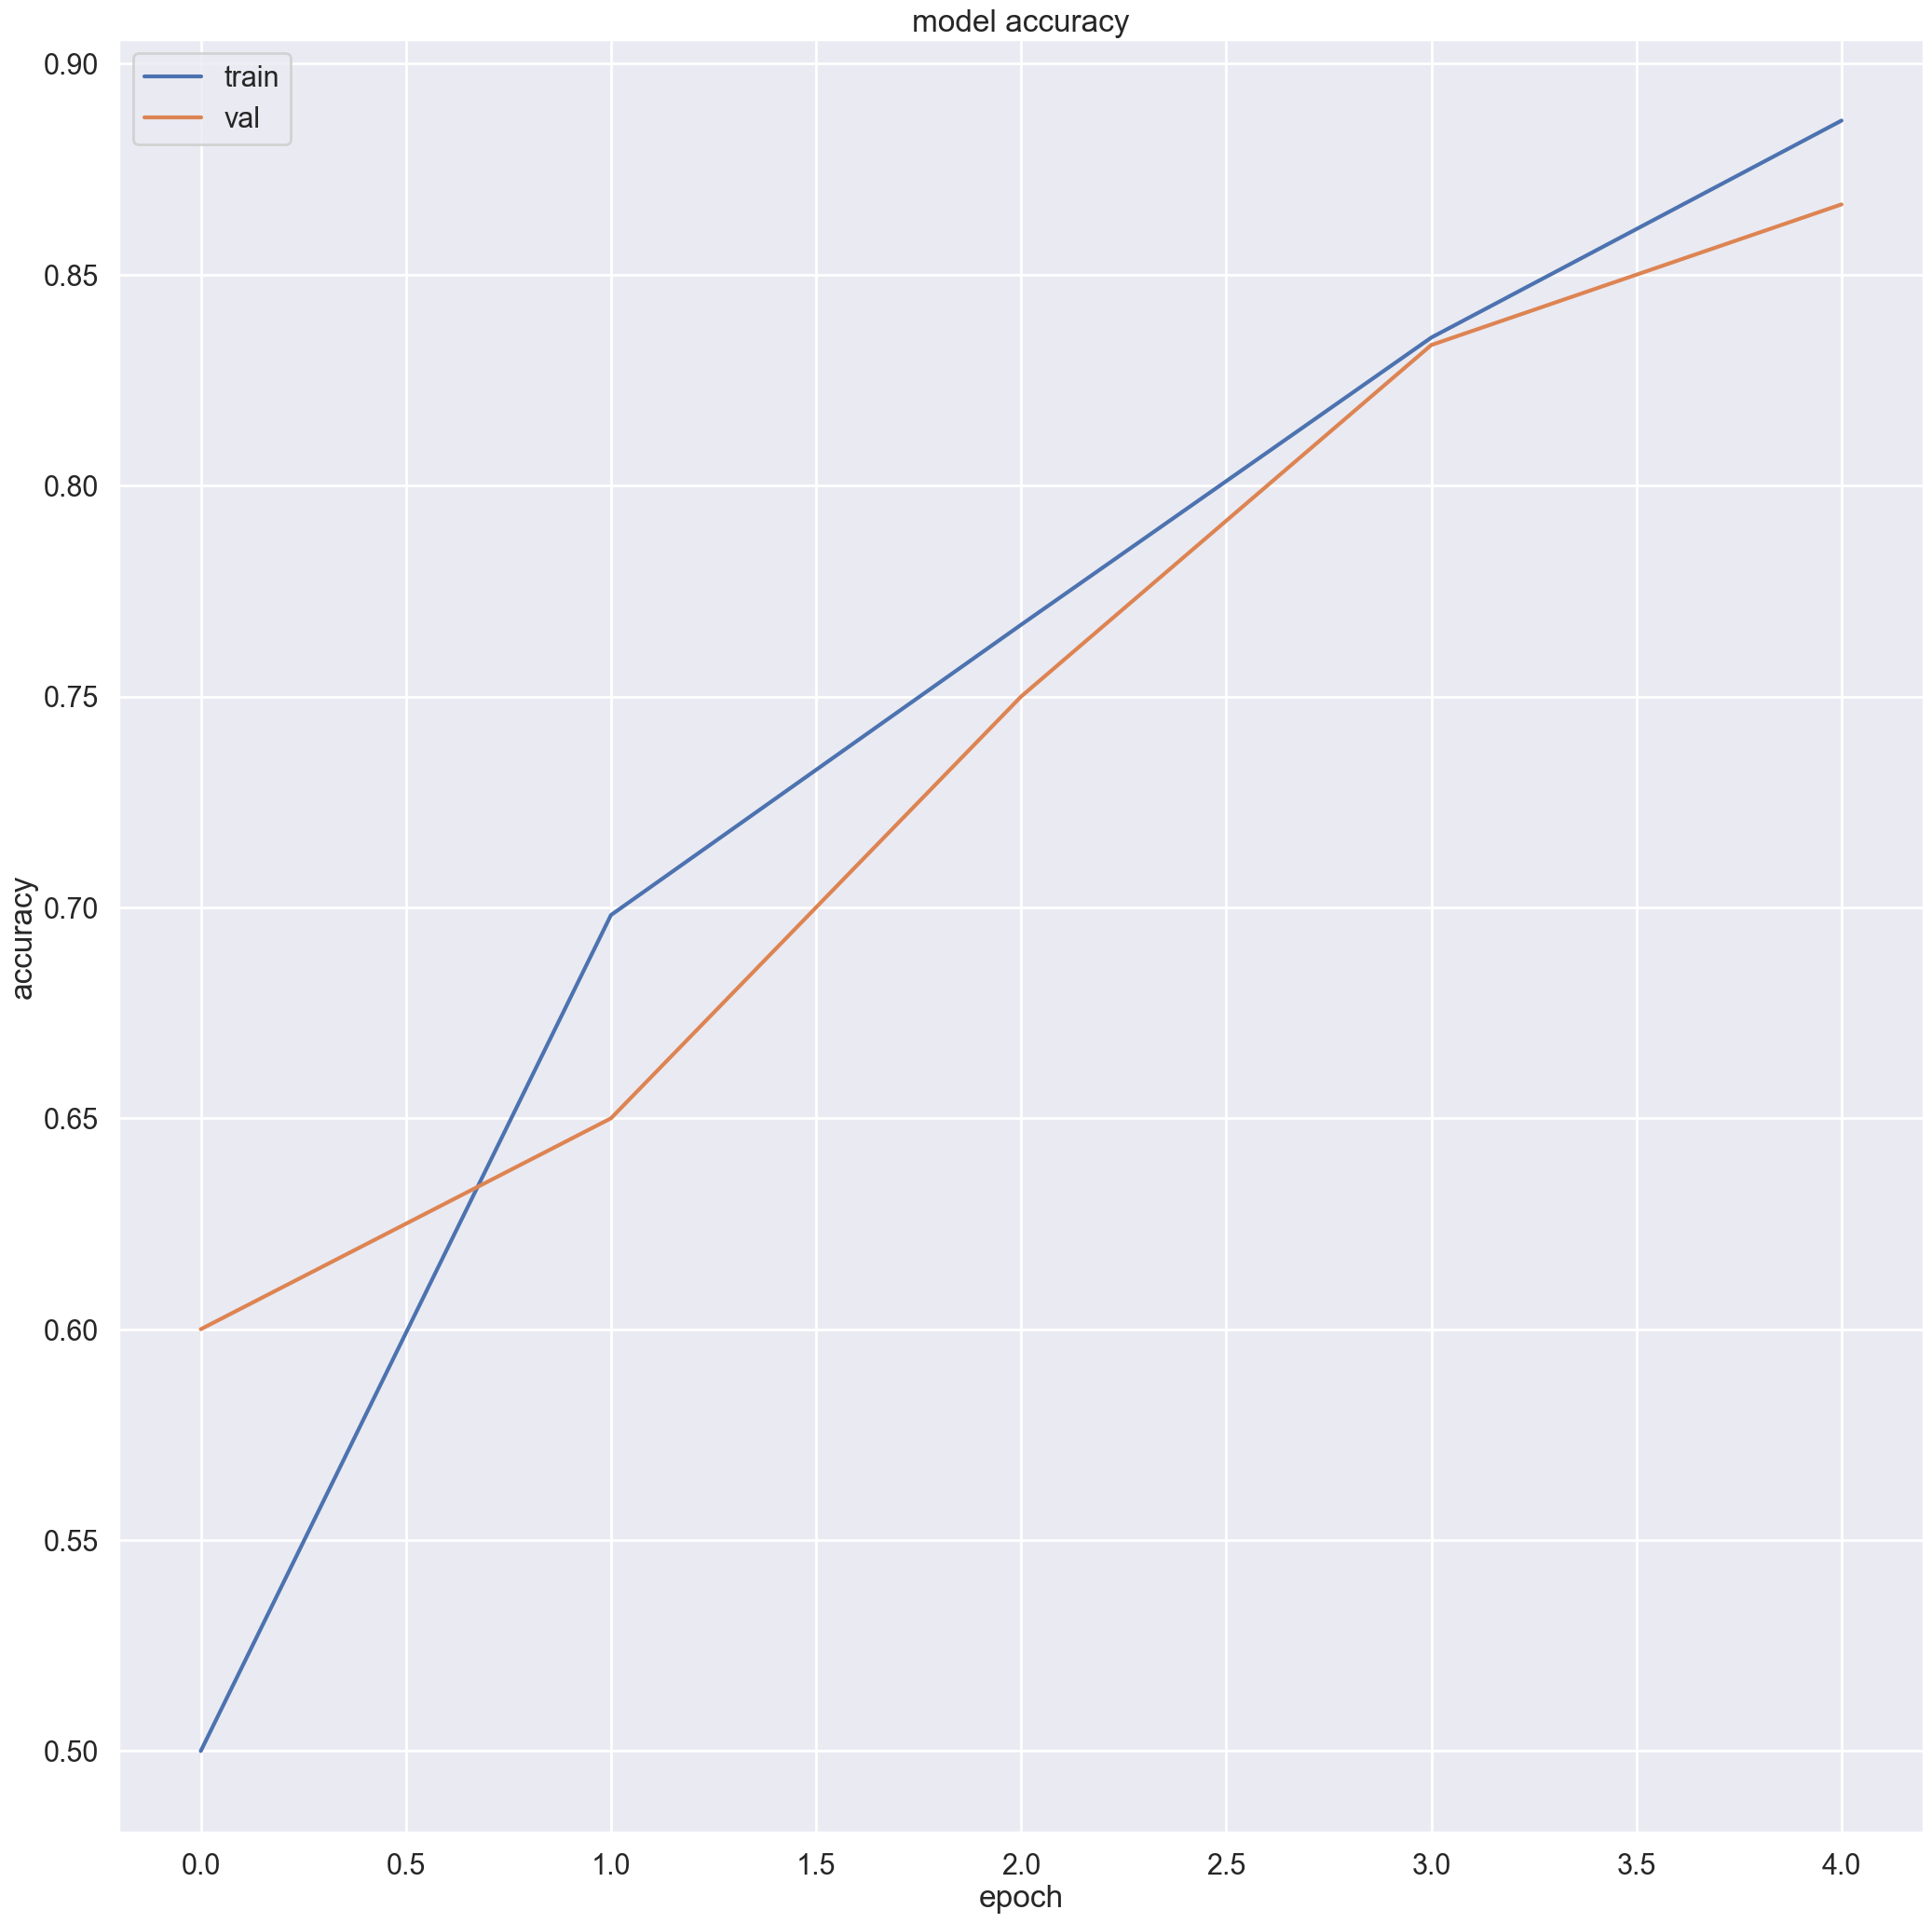

In [14]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
model.save("model.h5")

c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('D:\plant_disease_detection-main\Dataset\Test\Powdery\9f1061a618f3fcc9.jpg')

In [17]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 190ms/step


array([0.03779816, 0.9286641 , 0.03353773], dtype=float32)

In [18]:
labels=train_generator.class_indices
labels={v: k for k,v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [19]:
predicted_label = labels[np.argmax(predictions)]
if predicted_label=='Healthy':
    print("Your crop is well in health")
else:
    print("You need some recommendations for the health")
    if predicted_label==''


You need some recommendations for the health
